    Data: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

1. describe data
2. correlation between variables
3. pre-process age column and bucket them in to age groups
4. age groups frequency
5. age groups vs term deposits subscribed
6. education vs term deposits subscribed
7. job vs term deposits subscribed
8. cross tab of age, education, job vs term deposits subscribed
9. comparing age, marital status with balance, finding outlier
10. housing loan by job, marital status

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("bank-full.csv", sep=";")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


    Average age of customer is 41 years
    Average balance in the account is 1362
    Avergae duration seems to be 258 seconds, which is close to 4 minutes, 10 seconds

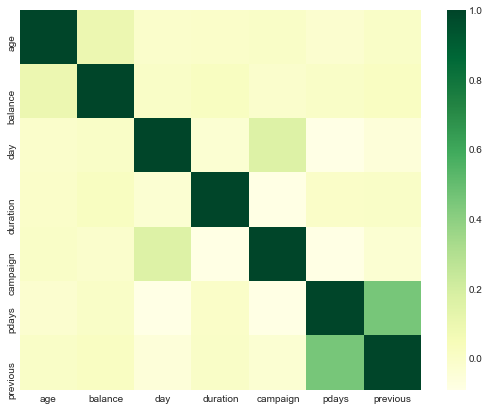

In [5]:
plt.figure(figsize=(9,7))
corr = df.corr()
sns.heatmap(corr, cmap = "YlGn")
plt.show()

    Looks like [previous, pdays], [day, duration], [day, campaign], [balance, age] have some correlation importance

In [6]:
df['age'].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88], dtype=int64)

    Bucketing ages into groups will help to visualize the data in a more readable way
    so let's put them into separate buckets

In [7]:
df['age'].min(), df['age'].max()

(18, 95)

    will take the age groups as 10-20, 20-30, .., 90-10 (inclusive ways)

In [8]:
age_buckets = ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
age_ranges = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
df['age_groups'] = pd.cut(df['age'], age_ranges, labels=age_buckets)
df[['age', 'age_groups']].head(10)

,age,age_groups
0,58,50-60
1,44,40-50
2,33,30-40
3,47,40-50
4,33,30-40
5,35,30-40
6,28,20-30
7,42,40-50
8,58,50-60
9,43,40-50


In [9]:
age_grps_freq = df['age_groups'].value_counts() 
age_grps_freq

30-40     17687
40-50     11239
50-60      8067
20-30      6933
60-70       701
70-80       388
10-20        97
80-90        92
90-100        7
Name: age_groups, dtype: int64

    age group 30-40s stands out first, followed by 40-50s, 50-60s who have accounts
    further will breakdown the age groups by term deposit subscribed to see, if age has a impact

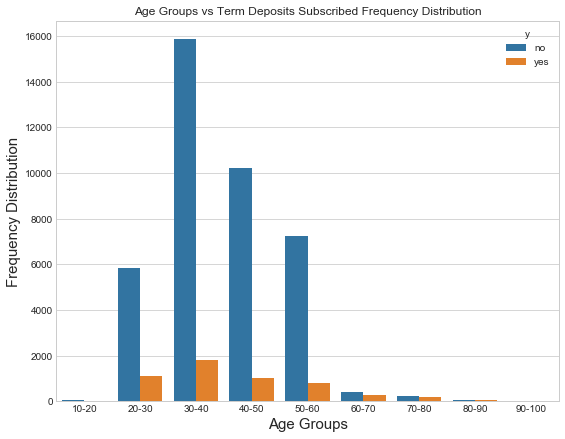

In [10]:
df_age = df.groupby(['age_groups', 'y'], as_index=False).agg({'poutcome': 'count'})
df_age = df_age.rename(columns={'poutcome': 'freq'})

plt.figure(figsize=(9,7))
ax = sns.barplot(x="age_groups", y="freq", hue="y", data=df_age)
plt.title('Age Groups vs Term Deposits Subscribed Frequency Distribution')
plt.ylabel('Frequency Distribution', fontsize=15)
plt.xlabel('Age Groups', fontsize=15)
plt.show()

    Again age group 30-40s seems to have more term deposits subscribed followed by 20-30s, 40-50s, 50-60s
    will use the same code, but this time with education

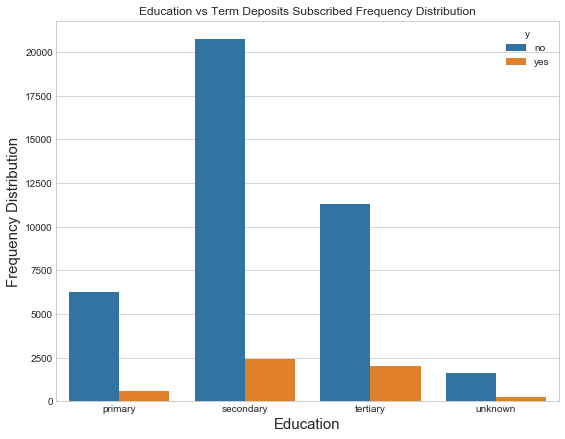

In [11]:
df_education = df.groupby(['education', 'y'], as_index=False).agg({'poutcome': 'count'})
df_education = df_education.rename(columns={'poutcome': 'freq'})

plt.figure(figsize=(9,7))
ax = sns.barplot(x="education", y="freq", hue="y", data=df_education)
plt.title('Education vs Term Deposits Subscribed Frequency Distribution')
plt.ylabel('Frequency Distribution', fontsize=15)
plt.xlabel('Education', fontsize=15)
plt.show()

    secondary, tertiary educated have more term deposits subscribed
    this time will use the same technique but will do this with cross tab against job

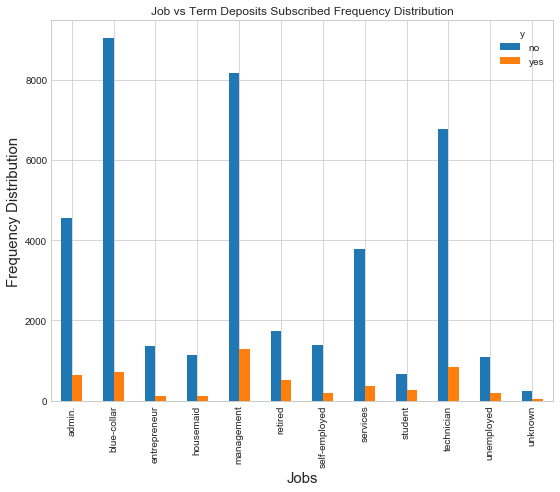

In [12]:
ct = pd.crosstab(df.job, df.y)
plt.rcParams["figure.figsize"] = [9, 7]
ct.plot.bar()
plt.title('Job vs Term Deposits Subscribed Frequency Distribution')
plt.ylabel('Frequency Distribution', fontsize=15)
plt.xlabel('Jobs', fontsize=15)
plt.show()

1. management profession seems to be standing out, followed by technician, ble-collar, admin
2. entrepeneur is very low, they keep investing it in business is it ?
3. unknown profession is very less, that makes sense

In [13]:
df_subsribed_deposits = pd.crosstab([df.age, df.education, df.job], df.y,  margins=True)
df_subsribed_deposits[df_subsribed_deposits['yes'] > 0].sort_values('yes', ascending=False).head(40)

,,y,no,yes,All
age,education,job,,,
All,,,39922,5289,45211
35,tertiary,management,342,69,411
31,tertiary,management,364,69,433
33,tertiary,management,381,62,443
32,tertiary,management,391,60,451
30,tertiary,management,343,58,401
34,tertiary,management,385,57,442
36,tertiary,management,341,55,396
37,tertiary,management,281,51,332


        so from the above table, what we observed is people with age range from 30-50 who have studied secondary, tertiary education and working in one of the following areas  management, technican, admin have more term deposits subscribed

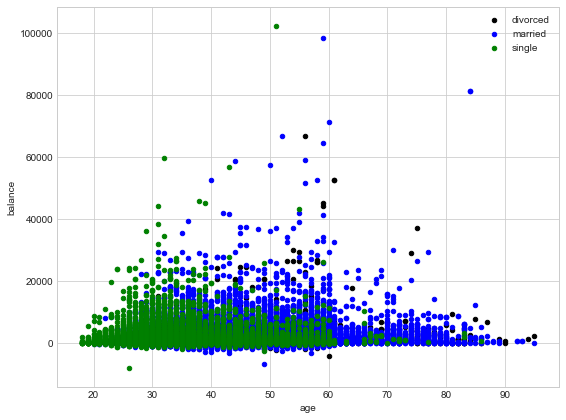

In [14]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = [14, 7]
colors = {'married':'blue', 'divorced':'black', 'single':'green'}

grouped = df.groupby('marital')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='age', y='balance', label=key, color=colors[key])

plt.show()

    There seems to be couple of outlier, one at 100000, another one just below it and another one just above 8000
    lets filter them out and see

In [15]:
df[df['balance'] > 80000]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_groups
26227,59,management,married,tertiary,no,98417,no,no,telephone,20,nov,145,5,-1,0,unknown,no,50-60
39989,51,management,single,tertiary,no,102127,no,no,cellular,3,jun,90,1,-1,0,unknown,no,50-60
42558,84,retired,married,secondary,no,81204,no,no,telephone,28,dec,679,1,313,2,other,yes,80-90
43393,84,retired,married,secondary,no,81204,no,no,telephone,1,apr,390,1,94,3,success,yes,80-90


    actually there are 4 outliers as two balance are same, so the bubbles were overlapped
    is having higher balance in account means there are no loans for that person ?

In [16]:
check_balance = df[( (df['loan'] == 'yes') & (df['housing'] == 'yes') )]
len(check_balance), check_balance['balance'].min(), check_balance['balance'].max()

(4367, -3313, 34230)

In [17]:
check_balance = df[( (df['loan'] == 'no') & (df['housing'] == 'no') )]
len(check_balance), check_balance['balance'].min(), check_balance['balance'].max()

(17204, -1968, 102127)

    yes the higher balance falls in the category where no personal and home loans, but at the same time there are some accounts which have minus balances in this category

    breaking down how much people have taken housing loan by profession & marital status might be a intresting factor too

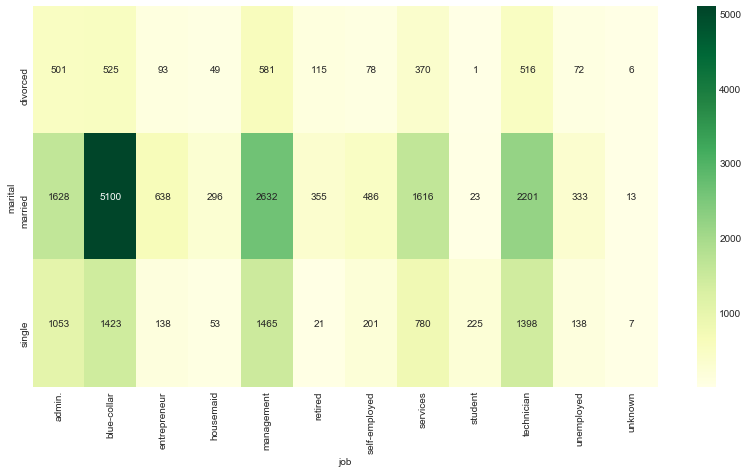

In [18]:
housing_loan = df[df['housing'] == 'yes']
housing_loan = housing_loan.groupby(['job', 'marital'], as_index=False).agg({'poutcome': 'count'})
housing_loan = housing_loan.rename(columns={'poutcome': 'freq'}).pivot(index='marital', columns='job', values='freq')
sns.heatmap(housing_loan, annot=True, fmt="g", cmap='YlGn')

    married with profession blue-collar, management, technician, services seems to have more housing loans
    single with the above same profession have taken more housing loans

    TODO:
    Analyze campaign impact
    Apply ML Model